# Pendahuluan

## Latar Belakang
- Di Indonesia pada remaja ini marak penggunaan aplikasi pemesanan online. Dimana harga yang diberikan berbeda - beda. Perbedaan ini mulai dari aplikasi pesanan online yang digunakan, cuaca, jam, jarak, dan masih banyak lagi. Hal ini memberikan suatu rumusan masalah. Apakah faktor - faktor tersebut mempengaruhi harga pesanan secara signifikan? Apa saja faktor yang mempengaruhi harga pesanan secara signifikan?


## Data
- Data yang digunakan merupakan dataset dari kaggle dengan judul ''Uber and Lyft Dataset Boston, MA''
- Pada dataset tersebut terdiri dari 57 kolom fitur dan 693071 baris
- Beberapa kolom atau kelas yang tersedia pada dataset adalah sebagai berikut:
    - id = berisi identitas pemesanan 
    - timestamp = catatan digital peristiwa terjadi
    - hour, day, month, datetime = waktu pemesanan (26 Nov-19 Des 2018)
    - timezone = daerah waktu pemesanan
    - source = asal
    - destination = tujuan
    - cab_type = tipe aplikasi yang digunakan Uber dan Lyft
    - terdapat beberapa fitur lain yang berada dalam dataset seperti cuaca, suhu, kecepatan angin, dan jam sore dari data pemesanan
- Dataset ini bersumber dari kaggle dimana berisi pesanan dari aplikasi pesan kendaraan online Uber dan Lyft yang beroperasi di daerah New York, Amerika


## Tujuan
- Dari uraian latar belakang dan data, diharapkan nantinya kita dapat memprediksi harga untuk pemesanan bergantung pada fitur apa saja dengan menggunakan model regresi linear

# Import Pustaka

In [61]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from scipy.stats import skew
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline 

# Memuat Data

In [2]:
# memanggil data yang akan digunakan
df=pd.read_csv('rideshare_kaggle.csv')
df.shape

(693071, 57)

- dataset berisi 57 kolom atau fitur dengan 693071 baris atau data pesanan

In [3]:
# memberikan informasi singkat dari setiap kolom salah satunya tipe data
# terdapat data yang berupa data numerik dan kategori data
# untuk mempermudah analisis kita dapat memisahkan kedua tipe data tersebut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
# jumlah data yang unik
for col in df:
    print(f'{col} : {len(df[col].unique())}')

id : 693071
timestamp : 36179
hour : 24
day : 17
month : 2
datetime : 31350
timezone : 1
source : 12
destination : 12
cab_type : 2
product_id : 13
name : 13
price : 148
distance : 549
surge_multiplier : 7
latitude : 11
longitude : 12
temperature : 308
apparentTemperature : 319
short_summary : 9
long_summary : 11
precipIntensity : 63
precipProbability : 29
humidity : 51
windSpeed : 291
windGust : 286
windGustTime : 25
visibility : 227
temperatureHigh : 129
temperatureHighTime : 23
temperatureLow : 133
temperatureLowTime : 31
apparentTemperatureHigh : 124
apparentTemperatureHighTime : 27
apparentTemperatureLow : 136
apparentTemperatureLowTime : 32
icon : 7
dewPoint : 313
pressure : 316
windBearing : 195
cloudCover : 83
uvIndex : 3
visibility.1 : 227
ozone : 274
sunriseTime : 110
sunsetTime : 114
moonPhase : 18
precipIntensityMax : 65
uvIndexTime : 20
temperatureMin : 131
temperatureMinTime : 25
temperatureMax : 128
temperatureMaxTime : 23
apparentTemperatureMin : 137
apparentTemperatureM

# Pembersihan Data

## fitur yang tidak terikat

In [5]:
print(df.timezone.unique())

['America/New_York']


In [6]:
print(df.long_summary.unique())

[' Rain throughout the day. '
 ' Rain until morning, starting again in the evening. '
 ' Light rain in the morning. ' ' Partly cloudy throughout the day. '
 ' Mostly cloudy throughout the day. '
 ' Light rain in the morning and overnight. '
 ' Light rain until evening. ' ' Foggy in the morning. '
 ' Overcast throughout the day. ' ' Possible drizzle in the morning. '
 ' Rain in the morning and afternoon. ']


In [7]:
df_1 = df[['price','timestamp','datetime','windGustTime',
                    'temperatureHighTime','temperatureLowTime',
                    'apparentTemperatureHighTime','apparentTemperatureLowTime',
                    'sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime', 
                    'temperatureMaxTime','apparentTemperatureMinTime',
                    'apparentTemperatureMaxTime']]
print(df.shape)
df_1.head(2)

(693071, 57)


,price,timestamp,datetime,windGustTime,temperatureHighTime,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime
0,5.0,1.544953e+09,2018-12-16 09:30:07,1545015600,1544968800,1545048000,1544968800,1545044400,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000
1,11.0,1.543284e+09,2018-11-27 02:00:23,1543291200,1543251600,1543298400,1543251600,1543291200,1543232969,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600


<AxesSubplot:>

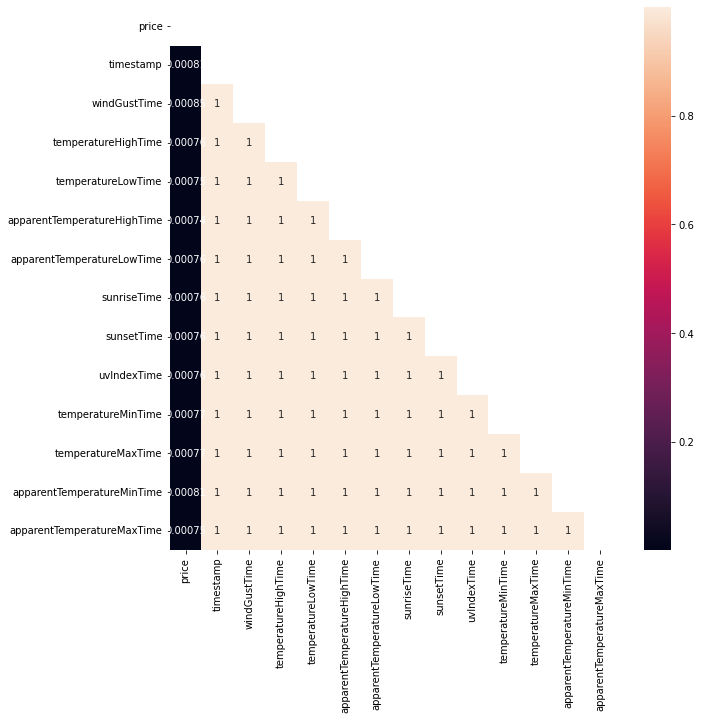

In [8]:
plt.figure(figsize=(10,10))
sb.heatmap(df_1.corr(),annot=True, mask=np.triu(df_1.corr()))

- terdapat fitur - fitur yang tidak terikat dengan penentuan harga dan terdapat fitur yang memiliki fungsi yang sama
- fitur - fitur:
    - id : merupakan identitas dari pemesan yang tidak memiliki keterikatan dengan harga
    - timestamp dan time lainnya sudah diwakili dengan data hour, day, month. Selain itu data tersebut sama satu dan lainnya. dinuktikan dengan heatmap dimana korelasi time satu sama lain = 1 atau data sangat mirip, serta memiliki korelasi yang mendekati 0 atau tidak terikat dengan price
    - timezone : hanya memiliki 1 data untuk semua pemesanan
    - latitude dan longitude : diwakili dengan source dan destination
    - long summary : data berupa teks panjang yang sulit untuk dianalisis
- fitur - fitur ini dapat dihapus dari dataset karena tidak memiliki keterikatan atau sudah diwakili oleh fitur lainnya

In [9]:
df=df.drop(['id','timestamp','datetime','windGustTime',
                    'temperatureHighTime','temperatureLowTime',
                    'apparentTemperatureHighTime','apparentTemperatureLowTime',
                    'sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime', 
                    'temperatureMaxTime','apparentTemperatureMinTime',
                    'apparentTemperatureMaxTime','timezone','latitude', 
                    'longitude','long_summary'], axis=1)
print(df.shape)
df.head(2)

(693071, 38)


,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92


# Eksplorasi Data

## pengaruh temperatur

- pada fitur ini terdapat beberapa kolom yang menyajikan temperatur
- apakah fitur temperatur akan mempengaruhi nilai harga dengan mengecek korelasinya dengan heatmap

In [10]:
df_2 = df[['price','temperature','apparentTemperature','temperatureHigh', 
                'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow', 
                'temperatureMin','temperatureMax','apparentTemperatureMin', 
                'apparentTemperatureMax']]
print(df_2.shape)
df_2.head(2)

(693071, 11)


,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,47.30,36.20,43.92


<AxesSubplot:>

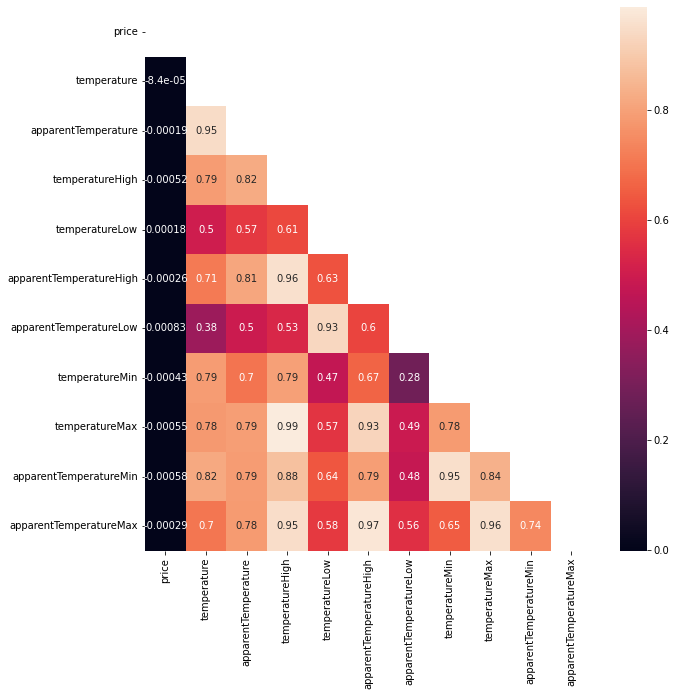

In [11]:
plt.figure(figsize=(10,10))
sb.heatmap(df_2.corr(),annot=True, mask=np.triu(df_2.corr()))

- heatmap menunjukan korelasi yang mendekati 0 untuk semua fitur temperatur
- dengan demikian kita dapat simpulkan temperatur tidak mempengaruhi price
- maka fitur temperatur dapat di drop dari dataset

In [12]:
df = df.drop(['temperature','apparentTemperature','temperatureHigh', 
                'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow', 
                'temperatureMin','temperatureMax','apparentTemperatureMin', 
                'apparentTemperatureMax'],axis=1)
print(df.shape)
df.head(2)

(693071, 28)


,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300


## pengaruh cuaca

- terdapat  kolom yang menyajikan cuaca
- apakah fitur cuaca akan mempengaruhi nilai harga dengan mengecek korelasinya dengan heatmap

In [13]:
df_3 = df[['price','precipIntensity','precipProbability','humidity',
                 'humidity','windSpeed','windGust','visibility','dewPoint',
                 'pressure','windBearing','cloudCover','uvIndex','visibility.1',
                 'ozone','moonPhase','precipIntensityMax']]
print(df_3.shape)
df_3.head(2)

(693071, 17)


,price,precipIntensity,precipProbability,humidity,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300


<AxesSubplot:>

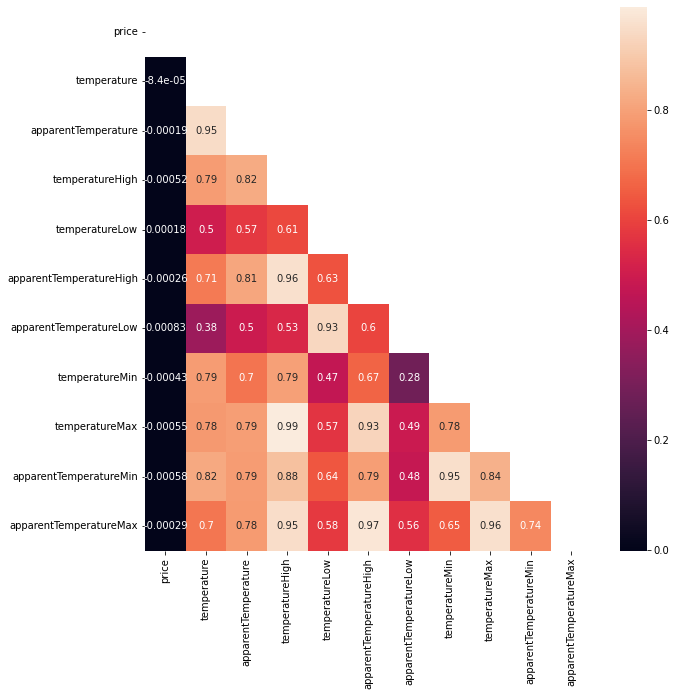

In [14]:
plt.figure(figsize=(10,10))
sb.heatmap(df_2.corr(),annot=True, mask=np.triu(df_2.corr()))

- heatmap menunjukan korelasi yang mendekati 0 untuk semua fitur cuaca terhadap price
- dengan demikian kita dapat simpulkan cuaca tidak mempengaruhi price
- maka fitur cuaca dapat di drop dari dataset

In [15]:
df = df.drop(['precipIntensity','precipProbability','humidity',
                 'humidity','windSpeed','windGust','visibility','dewPoint',
                 'pressure','windBearing','cloudCover','uvIndex','visibility.1',
                 'ozone','moonPhase','precipIntensityMax'],axis=1)
print(df.shape)
df.head(2)

(693071, 13)


,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain


## analisis data kategori

In [16]:
cat_feat = df.select_dtypes(include=['object','category']).columns.tolist()
df_cat = df[cat_feat]
print(df.shape)
df.head(2)

(693071, 13)


,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain


In [17]:
for col in df_cat:
    print(f'{col} : {df_cat[col].unique()}')
    print()

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear '

- fitur product id memiliki kategori dengan nama yang random dan menjadi tidak bisa dikategorikan atau didefinisikan
- fitur ini merupakan data yang dapat di drop dari dataset

In [18]:
df = df.drop(['product_id'],axis=1)
print(df.shape)
df.head(2)

(693071, 12)


,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain


## melabeli data

In [19]:
cat_feat = df.select_dtypes(include=['object','category']).columns.tolist()

for col in cat_feat:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names_out([col])
    df = df.drop(col, axis=1)
    df = pd.concat([df, enc_df], axis=1)

print('column :', df.columns)
print('shape :', df.shape)
df.head(2)

column : Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi',
       'name_U

,hour,day,month,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,27,11,11.0,0.44,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## pengaruh summary

In [20]:
df_4 = df[['price','short_summary_ Clear ',
       'short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ']]
print(df_4.shape)
df_4.head(2)

(693071, 10)


,price,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

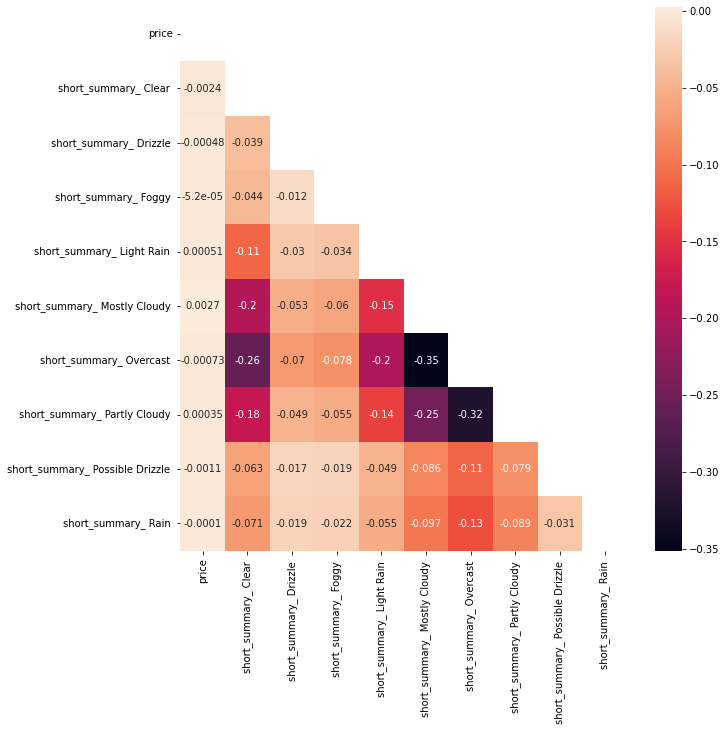

In [21]:
plt.figure(figsize=(10,10))
sb.heatmap(df_4.corr(),annot=True, mask=np.triu(df_4.corr()))

- semua fitur summary tidak memiliki korelasi dengan price, hal ini dapat kita drop dari dataset

In [22]:
df = df.drop(['short_summary_ Clear ',
       'short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain '],axis=1)
print(df.shape)

(693071, 52)


## pengaruh icon

In [23]:
df_5 = df[[ 'price','icon_ clear-day ', 'icon_ clear-night ',
       'icon_ cloudy ', 'icon_ fog ', 'icon_ partly-cloudy-day ',
       'icon_ partly-cloudy-night ', 'icon_ rain ']]
print(df_5.shape)
df_5.head(2)

(693071, 8)


,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

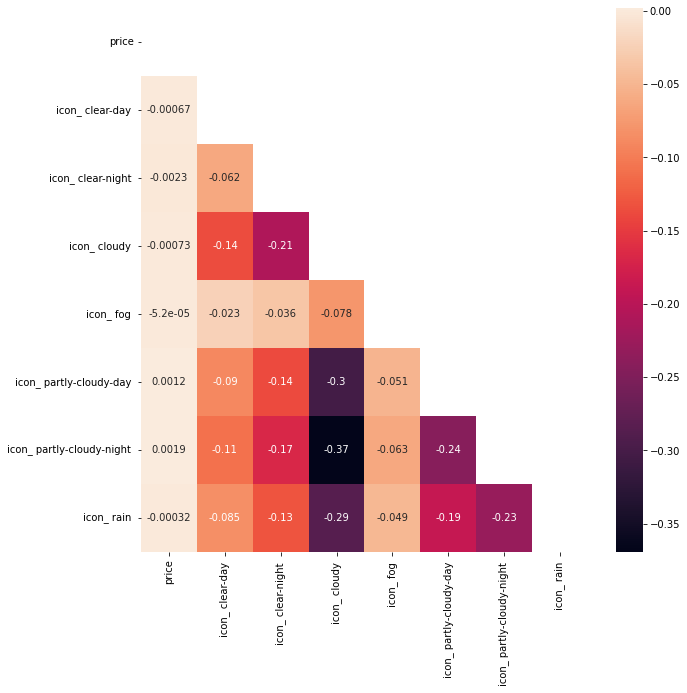

In [24]:
plt.figure(figsize=(10,10))
sb.heatmap(df_5.corr(),annot=True, mask=np.triu(df_5.corr()))

- semua fitur icon tidak memiliki korelasi dengan price, dengan demikian dapat kita drop dari dataset

In [25]:
df = df.drop(['icon_ clear-day ', 'icon_ clear-night ',
       'icon_ cloudy ', 'icon_ fog ', 'icon_ partly-cloudy-day ',
       'icon_ partly-cloudy-night ', 'icon_ rain '],axis=1)
print(df.shape)

(693071, 45)


## pengaruh asal

In [26]:
df_6 = df[[ 'price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End']]
print(df_6.shape)
df_6.head(2)

(693071, 13)


,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

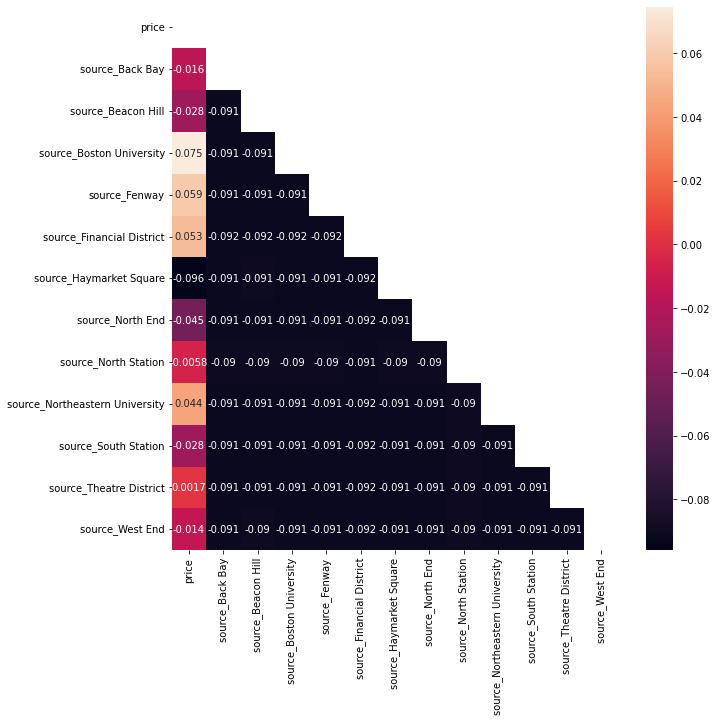

In [27]:
plt.figure(figsize=(10,10))
sb.heatmap(df_6.corr(),annot=True, mask=np.triu(df_6.corr()))

- semua fitur source tidak memiliki korelasi dengan price, dengan demikian dapat kita drop dari dataset

In [28]:
df = df.drop(['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End'],axis=1)
print(df.shape)

(693071, 33)


## pengaruh tujuan

In [29]:
df_7 = df[[ 'price','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']]
print(df_7.shape)
df_7.head(2)

(693071, 13)


,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

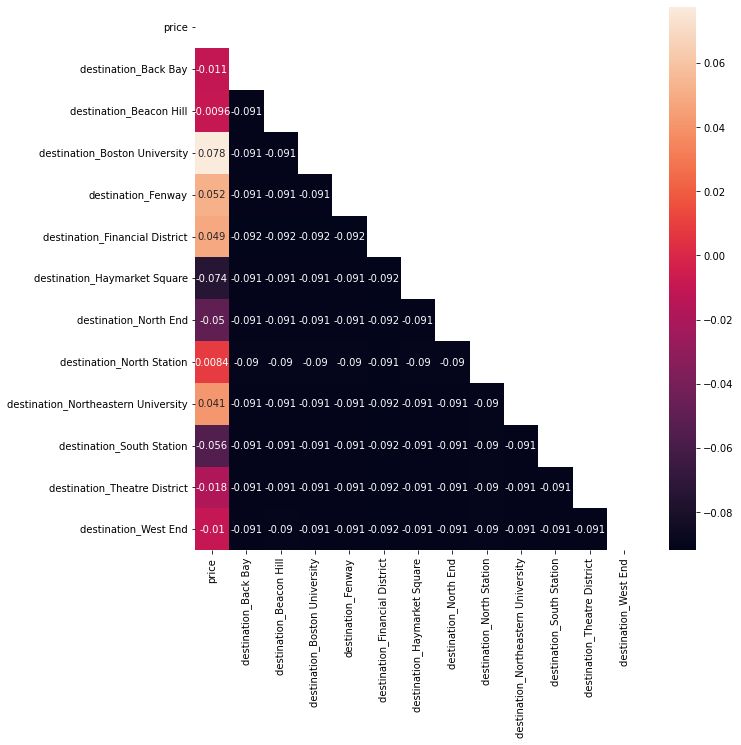

In [30]:
plt.figure(figsize=(10,10))
sb.heatmap(df_7.corr(),annot=True, mask=np.triu(df_7.corr()))

- semua fitur destination tidak memiliki korelasi dengan price, dengan demikian dapat kita drop dari dataset

In [31]:
df = df.drop(['destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End'],axis=1)
print(df.shape)

(693071, 21)


## pengaruh cab type

In [32]:
df_8 = df[['price', 'cab_type_Lyft','cab_type_Uber']]
print(df_8.shape)
df_8.head(2)

(693071, 3)


,price,cab_type_Lyft,cab_type_Uber
0,5.0,1.0,0.0
1,11.0,1.0,0.0


<AxesSubplot:>

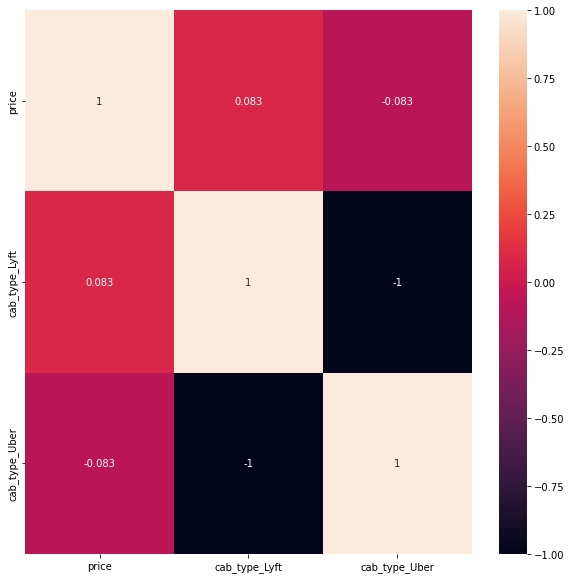

In [33]:
plt.figure(figsize=(10,10))
sb.heatmap(df_8.corr(),annot=True)

- semua fitur cab tidak memiliki korelasi dengan price, dengan demikian dapat kita drop dari dataset
- selain itu, dapat diketahui bahwa aplikasi pesanan yang digunakan baik uber ataupun lyft tidak mempengaruhi price. tidak ada aplikasi lebih murah ataupun lebih mahal

In [34]:
df = df.drop(['cab_type_Lyft','cab_type_Uber'],axis=1)
print(df.shape)

(693071, 19)


## pengaruh name

In [35]:
df_9 = df[['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV']]
print(df_9.shape)
df_9.head(2)

(693071, 13)


,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

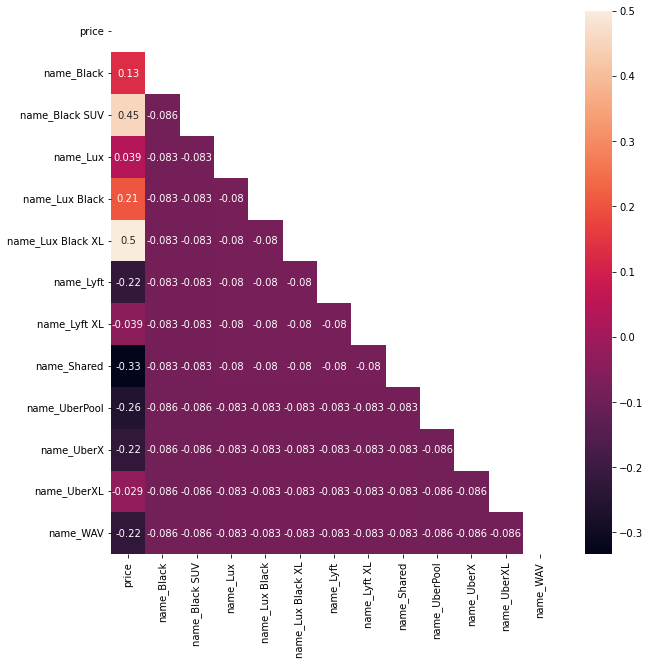

In [36]:
plt.figure(figsize=(10,10))
sb.heatmap(df_9.corr(),annot=True, mask=np.triu(df_9.corr()))

- fitur name merupakan jenis mobil yang digunakan untuk pesanan
- beberapa fitur name memiliki korelasi dengan price, dengan demikian name akan mempanguruhi nilai price 
- fitur name tidak perlu di drop dari dataset

## pengaruh fitur lainnya

In [37]:
df_10 = df[['price','hour', 'day', 'month', 'distance', 'surge_multiplier']]
print(df_10.shape)
df_10.head(2)

(693071, 6)


,price,hour,day,month,distance,surge_multiplier
0,5.0,9,16,12,0.44,1.0
1,11.0,2,27,11,0.44,1.0


<AxesSubplot:>

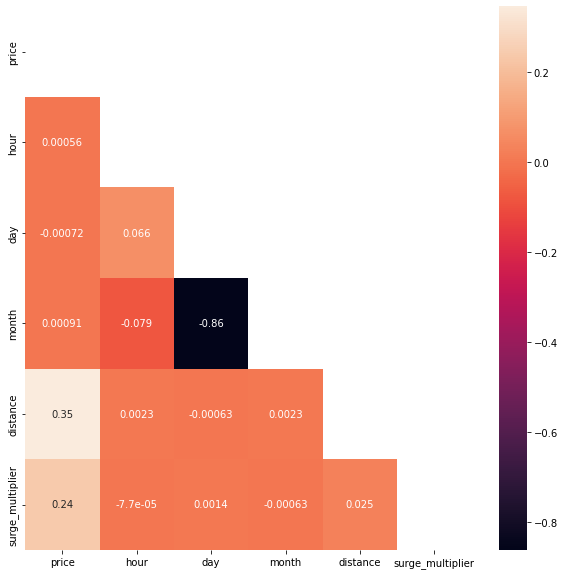

In [38]:
plt.figure(figsize=(10,10))
sb.heatmap(df_10.corr(),annot=True, mask=np.triu(df_10.corr()))

- selain fitur surge multiplier dan distance memiliki korelasi yang sangat rendah, yang tidak mempengaruhi nilai price dan dapat di drop dari dataset
- fitur surge multiplier dan distance memiliki korelasi untuk penentuan nilai price, maka fitur ini dipertahankan di dataset

In [39]:
df = df.drop(['hour', 'day', 'month'],axis=1)
print(df.shape)
df.head(2)

(693071, 16)


,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preprosesing

## data kosong

In [40]:
df.isnull().sum()

price                55095
distance                 0
surge_multiplier         0
name_Black               0
name_Black SUV           0
name_Lux                 0
name_Lux Black           0
name_Lux Black XL        0
name_Lyft                0
name_Lyft XL             0
name_Shared              0
name_Taxi                0
name_UberPool            0
name_UberX               0
name_UberXL              0
name_WAV                 0
dtype: int64

In [41]:
df = df.dropna(subset = ['price']).reset_index()

In [42]:
df.isnull().sum()

index                0
price                0
distance             0
surge_multiplier     0
name_Black           0
name_Black SUV       0
name_Lux             0
name_Lux Black       0
name_Lux Black XL    0
name_Lyft            0
name_Lyft XL         0
name_Shared          0
name_Taxi            0
name_UberPool        0
name_UberX           0
name_UberXL          0
name_WAV             0
dtype: int64

## outlier

/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

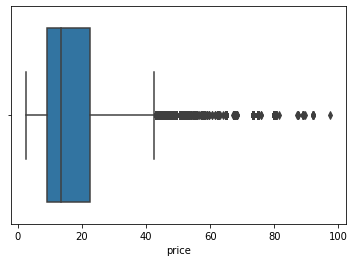

In [43]:
sb.boxplot(df['price'])

- terdapat banyak nilai outlier
- nilai outlier dapat menyebabkan error
- perlu melakukan drop pada data - data yang berada pada outlier

In [44]:
ambang_atas = df['price'].quantile(0.99)
print('ambang atas :', ambang_atas)
ambang_bawah = df['price'].quantile(0.01)
print('ambang bawah :', ambang_bawah)

ambang atas : 42.5
ambang bawah : 3.5


In [45]:
df_out_atas = df[df['price']>ambang_atas]
print(sorted(df_out_atas.price.unique()))

[43.0, 43.5, 44.0, 44.5, 45.0, 45.35, 45.5, 46.0, 46.5, 47.0, 47.5, 48.0, 48.5, 49.0, 49.5, 50.5, 51.0, 51.5, 52.0, 52.5, 53.0, 53.5, 54.0, 54.5, 55.0, 55.5, 56.0, 56.5, 57.0, 57.5, 58.0, 58.5, 59.0, 59.5, 60.5, 61.5, 62.0, 62.5, 63.0, 64.0, 64.5, 65.0, 67.0, 67.5, 68.0, 68.5, 73.5, 75.0, 76.0, 80.0, 80.5, 81.5, 87.0, 87.5, 89.0, 89.5, 92.0, 97.5]


- banyak nilai outlier yang berjarak jauh dengan nilai ambang batas atas (42.5)
- kita perlu untuk drop dengan nilai price yang jauh sehingga tidak meningkatkan nilai error

In [46]:
df_out_bawah= df[df['price']<ambang_bawah]
print(sorted(df_out_bawah.price.unique()))

[2.5, 3.0]


- hanya memiliki 2 nilai outlier yang jaraknya tidak terlalu jauh dari ambang batas bawah (3.5)
- sehingga kita dapat menggunakan nilai ini karena kemungkinan error kecil

In [47]:
drop = np.where(df['price']>43.5)
print(np.count_nonzero(np.where(df['price']>43.5)))

5285


- ada sebanyak 5285 data yang dapat kita hapus dari dataset

In [48]:
df.shape

(637976, 17)

In [49]:
df.drop(drop[0], inplace = True)
df.shape

(632691, 17)

## skewness

distance
0.7800170185979869


/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


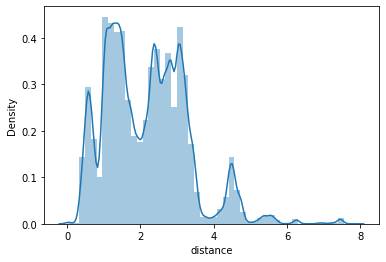

surge_multiplier
8.849789532177159


/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


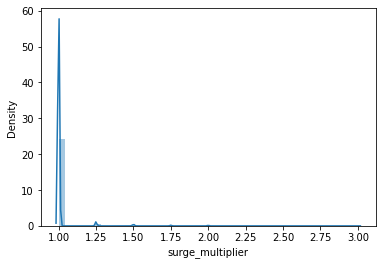

In [50]:
fitur = ['distance','surge_multiplier']
for col in fitur:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sb.distplot(df[col])
    plt.show()

- surge_multiplier memiliki nilai skewness yang besar, yang mengartikan bahwa data condong pada salah satu sisi dan tidak mengikuti fungsi distribusi normal
- nilai skewness yang besar memiliki ekor yang berpotensi sebagai outlier
- maka, perlu menurunkan nilai skewness dari dataset

In [51]:
# transformasi log
surge_log=np.log(df['surge_multiplier'])
surge_log.skew()

7.675563340641953

In [52]:
surge_log=df['surge_multiplier']
surge_log=np.log(df['surge_multiplier'])
surge_log.skew()

7.675563340641953

In [53]:
# transformasi akar
surge_sqrt= df['surge_multiplier']
surge_sqrt= np.sqrt(df['surge_multiplier'])
surge_sqrt.skew()

8.19181487692188

In [54]:
surge_bc= df['surge_multiplier']
surge_bc= stats.boxcox(df['surge_multiplier'])[0]
pd.Series(surge_bc).skew()

5.644799850662935

- dengan menggunakan boxcox skewness mengalami penurunan yang signifikan dari 8.84 menjadi 5.65

In [55]:
df['surge_multiplier']=stats.boxcox(df['surge_multiplier'])[0]
pd.Series(df['surge_multiplier']).skew()

5.644799850662935

# Pendefinisian Model

In [56]:
y = df['price'].values
X = df.drop(columns=['price'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
print('xtest :', X_test.shape)
print('xtrain :', X_train.shape)

xtest : (189808, 16)
xtrain : (442883, 16)


- membagi model menjadi train-dev-test

# Pelatihan Model

In [58]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
y_prediction = lin_reg.predict(X_test)

# Evaluasi Model

In [60]:
r2_score(y_test, y_pred)

0.9304520625768655